Import libraries.
<br>
In case there is a library which is not covered by requirements.txt, install it using pip. It can be done right here like "!pip install library_name"

In [46]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
set_config(transform_output="pandas")
# Set random seed is optional when working not in a group, just skip this parameter in split
RSEED = 42

Let us load Iris data set from sklearn library:

In [25]:
df = pd.read_csv('data/iris.csv')

Let add some description:

In [26]:
df.DESCR = """
iris dataframe, contains description and samples of a few species. Dataframe is for traning:

* sepal.length;
* sepal.width;
* petal.length;
* petal.width;
* variety aka species
"""

description = df.DESCR
print(description)


iris dataframe, contains description and samples of a few species. Dataframe is for traning:

* sepal.length;
* sepal.width;
* petal.length;
* petal.width;
* variety aka species



And check results:

In [27]:
df.head(n=1)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa


Let us rename columns, so they are more user friendly:

In [28]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'species']

Checking new columns names here:

In [29]:
df.head(n=1)

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,Setosa


Let us quickly explore quality of data.
<br>
as you can dataframe does not contain NaN values, which is very good for us:

In [30]:
df.isna().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
species      0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   species    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df.nunique()

sepal_len    35
sepal_wid    23
petal_len    43
petal_wid    22
species       3
dtype: int64

As we can see at this point, our data set contains 150 samples, which belong to 3 species:

In [34]:
df['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Let us quickly check if data has correlation:

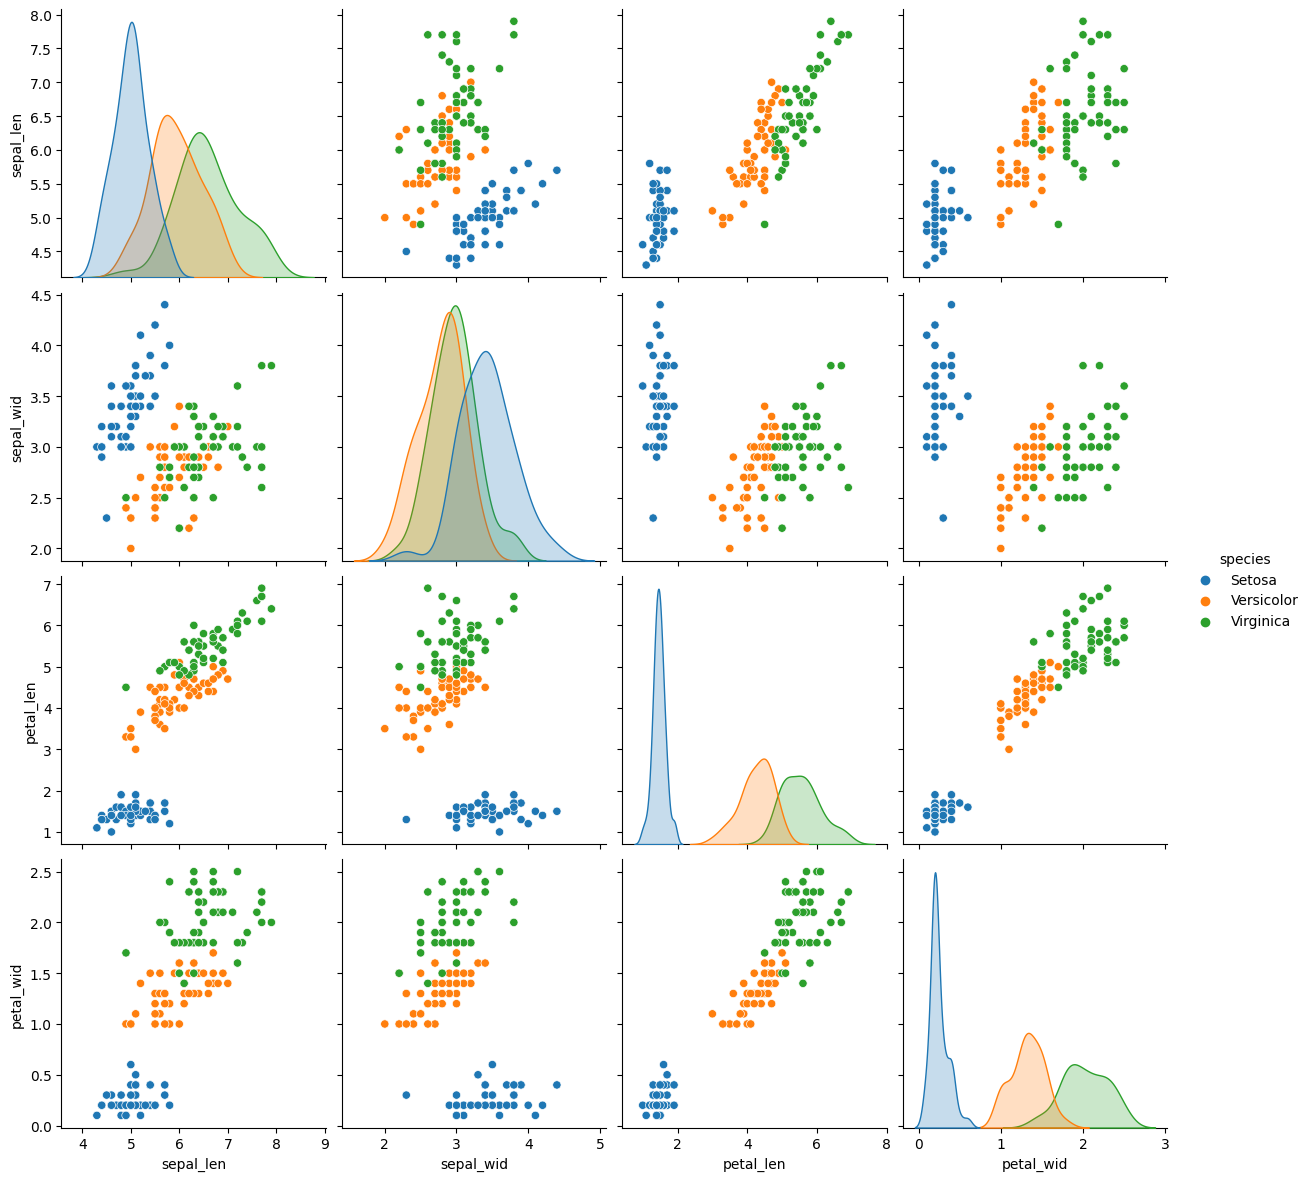

In [35]:
sns.pairplot(df, hue="species", height=3);

As we can see above there is a strong positive correlation between length and width of petal, let us narrow down the plot:

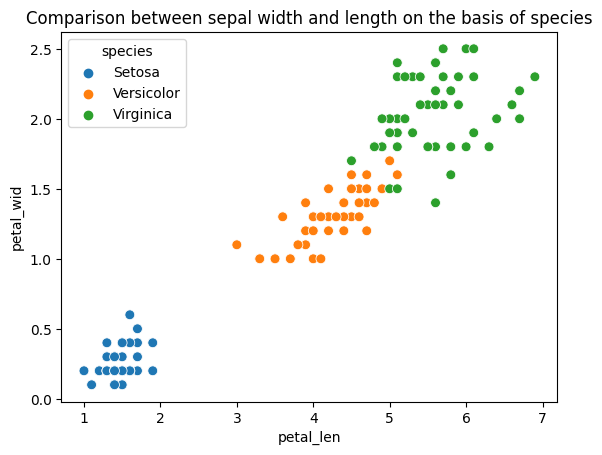

In [41]:
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(x=df['petal_len'], y=df['petal_wid'], hue = df['species'], s= 50);

Let us prepare our dataframe for training. Let us use i.e. simple Logistic Regression model.
As a result let us try to predict species
<br>
All the features are important to us, so we are not removing anything, except target feature itself:

In [37]:
# Define predictors X (features) and target variable y
X = df.drop('species', axis=1)
y = df['species']

print(f"We have {X.shape[0]} observations in our dataset and {X.shape[1]} features")
print(f"Our target vector has also {y.shape[0]} values")

We have 150 observations in our dataset and 4 features
Our target vector has also 150 values


Split into train and test sets, for splitting let us use size of test set 0.2 (which is 20% from 150 samples), additionally let us shuffle records in data set:

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=RSEED)

Let us quickly look inside, what do we have in there:

In [39]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


Let us use Logistic Regression model with multiple features:

In [42]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Prediction:

In [44]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

Evaluation:

Accuracy on train set: 0.98
Accuracy on test set: 1.0
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------------------------------------


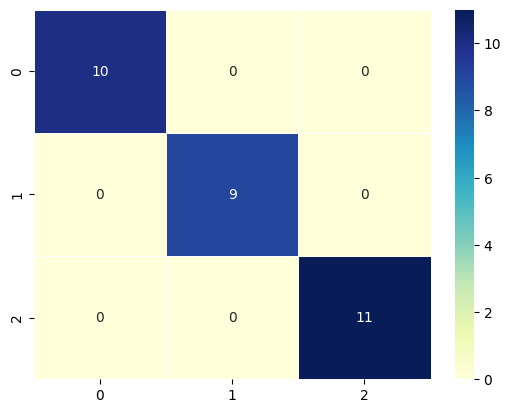

In [47]:
# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);